In [70]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [71]:
df=pd.read_csv("LoanApprovalPrediction.csv")

In [72]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [73]:
df.isna().sum().sum()

np.int64(149)

In [74]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [75]:
df.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [76]:
#fill the missing columns
df['Gender']=df['Gender'].fillna(df["Gender"].mode()[0])
df['Married']=df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].mode()[0])
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].mode()[0])
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].mode()[0])


In [77]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [78]:
df.shape

(614, 13)

In [79]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    str    
 1   Gender             614 non-null    str    
 2   Married            614 non-null    str    
 3   Dependents         614 non-null    str    
 4   Education          614 non-null    str    
 5   Self_Employed      614 non-null    str    
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    str    
 12  Loan_Status        614 non-null    str    
dtypes: float64(4), int64(1), str(8)
memory usage: 62.5 KB


In [80]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.410423,0.855049
std,6109.041673,2926.248369,84.180967,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [81]:
df.isnull().sum().sum()

np.int64(0)

In [82]:
import seaborn as sns

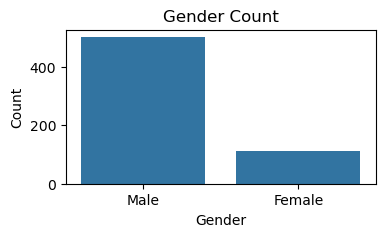

In [83]:
plt.figure(figsize=(4,2))
sns.countplot(x='Gender', data=df)
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

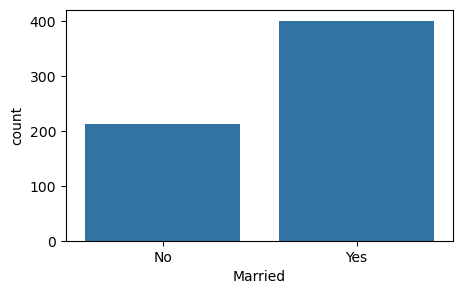

In [84]:
plt.figure(figsize=(5,3))
sns.countplot(x="Married",data=df)
plt.show()

Education  Graduate  Not Graduate
Married                          
No              168            45
Yes             312            89


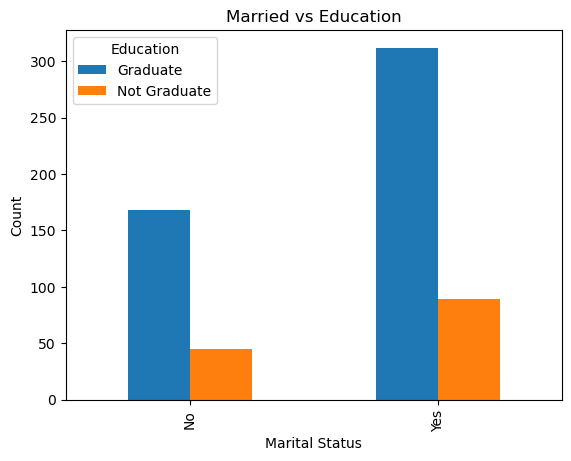

In [85]:
freq1 = pd.crosstab(df['Married'], df['Education'])
print(freq1)
freq1.plot(kind='bar')

plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Married vs Education')
plt.legend(title='Education')
plt.show()

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


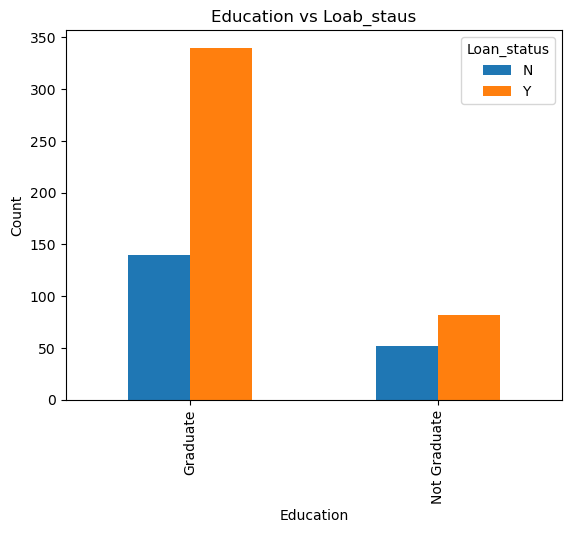

In [86]:
freq2 = pd.crosstab(df['Education'],df["Loan_Status"])
print(freq2)
freq2.plot(kind='bar')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education vs Loab_staus')
plt.legend(title='Loan_status')
plt.show()

In [87]:

df=pd.get_dummies(df,columns=["Gender"])
df=pd.get_dummies(df,columns=["Married"])
df=pd.get_dummies(df,columns=["Dependents"])
df=pd.get_dummies(df,columns=["Education"])
df=pd.get_dummies(df,columns=["Self_Employed"])
df=pd.get_dummies(df,columns=["Property_Area"])

In [88]:
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
x=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [91]:
model=KNeighborsClassifier(n_neighbors=11)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([False, False,  True, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False,  True, False, False, False, False,  True,  True,
        True, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [92]:
from sklearn.metrics import accuracy_score,classification_report
print("accuracy_score",accuracy_score(y_test,y_pred))
print("classification_report",classification_report(y_test,y_pred))

accuracy_score 0.6270270270270271
classification_report               precision    recall  f1-score   support

       False       0.68      0.87      0.76       127
        True       0.24      0.09      0.13        58

    accuracy                           0.63       185
   macro avg       0.46      0.48      0.44       185
weighted avg       0.54      0.63      0.56       185

